# Prototype Implementation of Logistic Regression

In [12]:
# import modules 

import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Prototype of Logistic Regression

class LogisticRegression:
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.theta)
            predictions = self.sigmoid(linear_model)
            gradient = (1 / n_samples) * np.dot(X.T, (predictions - y))
            self.theta -= self.learning_rate * gradient

    def predict_proba(self, X):
        linear_model = np.dot(X, self.theta)
        return self.sigmoid(linear_model)

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return [1 if p >= 0.5 else 0 for p in probabilities]

def generate_data(n_samples=100, class_sep=2.0):
    half_samples = n_samples // 2
    X0 = np.random.randn(half_samples, 2) + np.array([-class_sep, -class_sep])
    y0 = np.zeros(half_samples)
    X1 = np.random.randn(half_samples, 2) + np.array([class_sep, class_sep])
    y1 = np.ones(half_samples)

    X = np.vstack((X0, X1))
    y = np.hstack((y0, y1))
    shuffle_indices = np.random.permutation(n_samples)
    return X[shuffle_indices], y[shuffle_indices]

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict probabilities for grid points
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid).reshape(xx.shape)

    # Plot probability contours and decision boundary
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.6, cmap=plt.cm.PuBu)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", marker='o')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", marker='x')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title(title)
    plt.show()


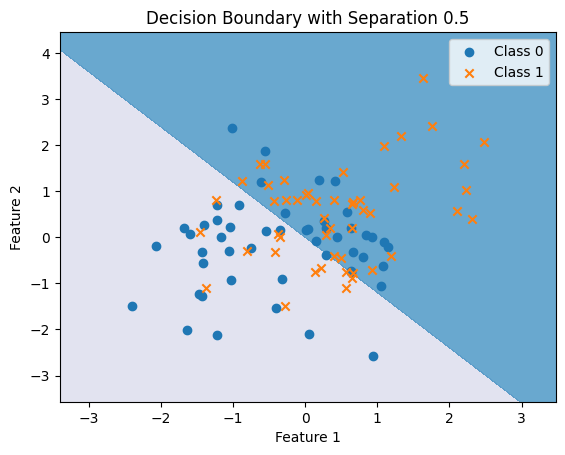

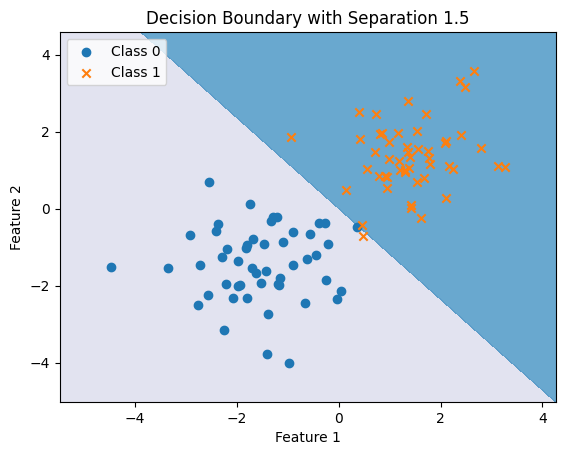

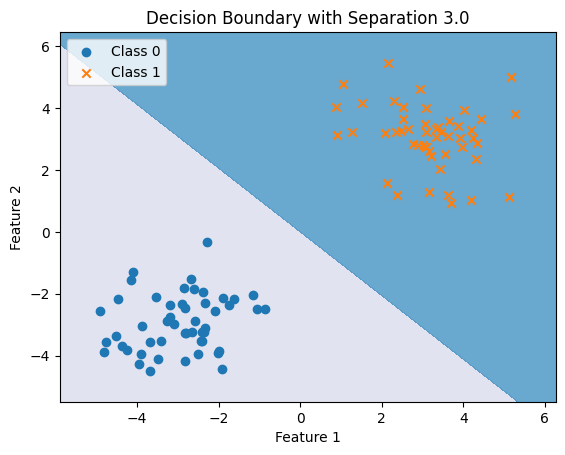

In [9]:
# Generate data with different separations
for sep in [0.5, 1.5, 3.0]:
    X, y = generate_data(n_samples=100, class_sep=sep)
    model = LogisticRegression(learning_rate=0.1, n_iterations=1000)
    model.fit(X, y)
    plot_decision_boundary(model, X, y, title=f"Decision Boundary with Separation {sep}")

In [10]:
# Generate synthetic data with optional noise
def generate_data(n_samples=100, class_sep=2.0, noise_level=0.0):
    half_samples = n_samples // 2
    X0 = np.random.randn(half_samples, 2) + np.array([-class_sep, -class_sep])
    X1 = np.random.randn(half_samples, 2) + np.array([class_sep, class_sep])

    # Add Gaussian noise
    X0 += noise_level * np.random.randn(half_samples, 2)
    X1 += noise_level * np.random.randn(half_samples, 2)

    y0 = np.zeros(half_samples)
    y1 = np.ones(half_samples)

    X = np.vstack((X0, X1))
    y = np.hstack((y0, y1))
    shuffle_indices = np.random.permutation(n_samples)
    return X[shuffle_indices], y[shuffle_indices]

# Logistic Regression with optional regularization
class LogisticRegression:
    def __init__(self, learning_rate=0.1, n_iterations=1000, regularization=0.0):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.theta)
            predictions = self.sigmoid(linear_model)
            gradient = (1 / n_samples) * np.dot(X.T, (predictions - y))

            # Add L2 regularization to the gradient
            gradient += self.regularization * self.theta
            self.theta -= self.learning_rate * gradient

    def predict_proba(self, X):
        linear_model = np.dot(X, self.theta)
        return self.sigmoid(linear_model)

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict probabilities for grid points
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid).reshape(xx.shape)

    # Plot probability contours and decision boundary
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.6, cmap=plt.cm.PuBu)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", marker='o')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", marker='x')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title(title)
    plt.show()

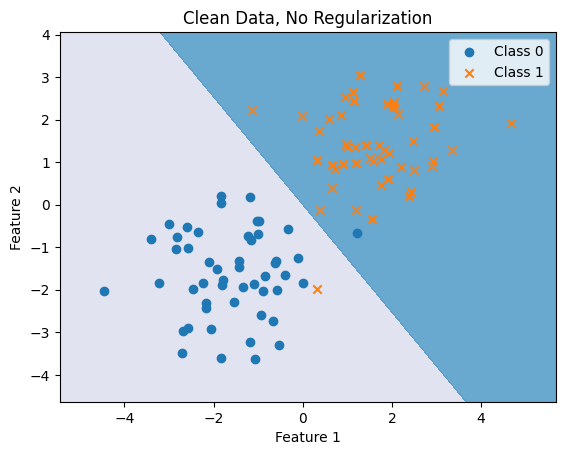

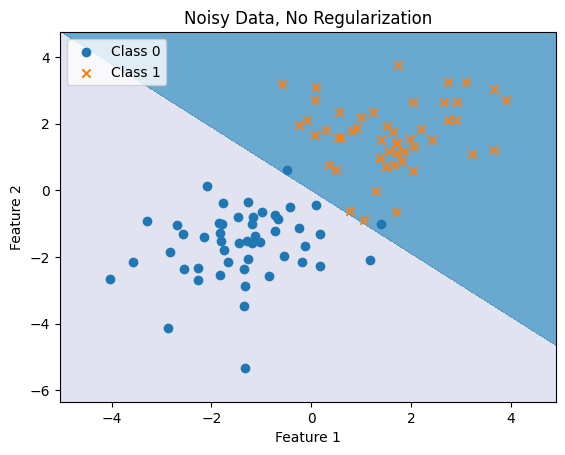

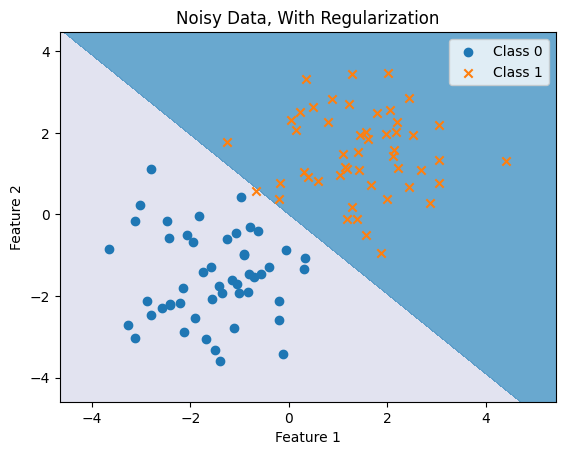

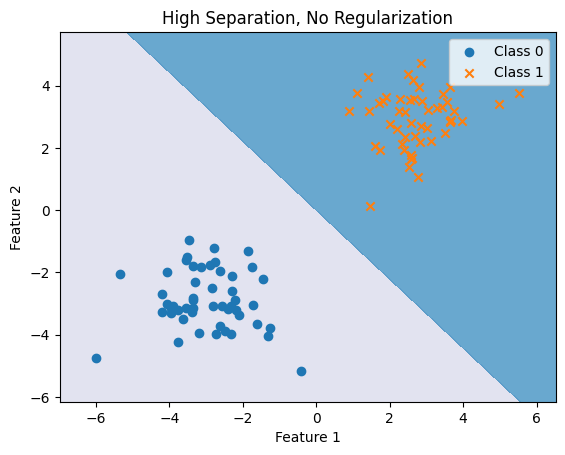

In [11]:
# Experiment: Different settings impacting class separation
experiments = [
    {"class_sep": 1.5, "noise": 0.0, "regularization": 0.0, "title": "Clean Data, No Regularization"},
    {"class_sep": 1.5, "noise": 0.5, "regularization": 0.0, "title": "Noisy Data, No Regularization"},
    {"class_sep": 1.5, "noise": 0.5, "regularization": 0.1, "title": "Noisy Data, With Regularization"},
    {"class_sep": 3.0, "noise": 0.0, "regularization": 0.0, "title": "High Separation, No Regularization"}
]

# Run experiments
for exp in experiments:
    X, y = generate_data(n_samples=100, class_sep=exp["class_sep"], noise_level=exp["noise"])
    model = LogisticRegression(learning_rate=0.1, n_iterations=1000, regularization=exp["regularization"])
    model.fit(X, y)
    plot_decision_boundary(model, X, y, exp["title"])

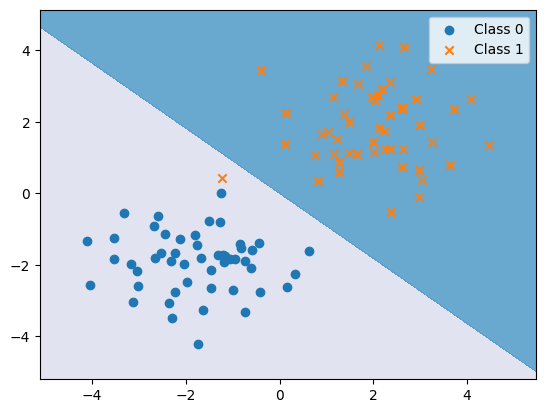

In [48]:
# Generate synthetic data
def generate_data(n_samples=100, class_sep=2.0):
    half_samples = n_samples // 2
    X0 = np.random.randn(half_samples, 2) + np.array([-class_sep, -class_sep])
    X1 = np.random.randn(half_samples, 2) + np.array([class_sep, class_sep])
    X = np.vstack((X0, X1))
    y = np.hstack((np.zeros(half_samples), np.ones(half_samples)))
    return X, y

class LogisticRegression:
    def __init__(self, learning_rate=0.1, n_iterations=1000, regularization=0.0):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)
        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.theta)
            predictions = self.sigmoid(linear_model)
            gradient = (1 / n_samples) * np.dot(X.T, (predictions - y))
            gradient += self.regularization * self.theta
            self.theta -= self.learning_rate * gradient

    def plot_boundary(self, X, y):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = self.sigmoid(np.dot(grid, self.theta)).reshape(xx.shape)
        plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.6, cmap=plt.cm.PuBu)
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', label='Class 0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='x', label='Class 1')
        plt.legend()
        plt.show()

# Run the experiment
X, y = generate_data()
model = LogisticRegression(learning_rate=0.01, n_iterations=500, regularization=0.1)
model.fit(X, y)
model.plot_boundary(X, y)

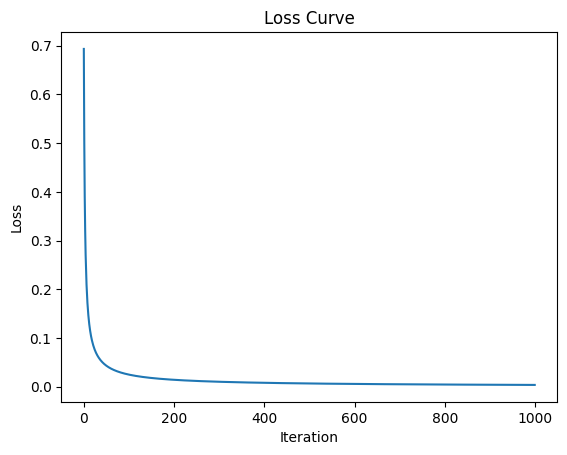

In [37]:
# loss curve at convergence

class LogisticRegression:
    def __init__(self, learning_rate=0.1, n_iterations=1000, tolerance=1e-4):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tolerance = tolerance
        self.theta = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        linear_model = np.dot(X, self.theta)
        predictions = self.sigmoid(linear_model)
        loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        return loss

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)

        for i in range(self.n_iterations):
            linear_model = np.dot(X, self.theta)
            predictions = self.sigmoid(linear_model)
            gradient = (1 / n_samples) * np.dot(X.T, (predictions - y))

            new_theta = self.theta - self.learning_rate * gradient

            # Compute and store loss
            loss = self.compute_loss(X, y)
            self.loss_history.append(loss)

            # Check for convergence
            if np.linalg.norm(new_theta - self.theta) < self.tolerance:
                print(f"Converged at iteration {i}")
                break

            self.theta = new_theta

    def plot_loss(self):
        plt.plot(self.loss_history)
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.title("Loss Curve")
        plt.show()

# Generate synthetic data
def generate_data(n_samples=100, class_sep=2.0):
    half_samples = n_samples // 2
    X0 = np.random.randn(half_samples, 2) + np.array([-class_sep, -class_sep])
    X1 = np.random.randn(half_samples, 2) + np.array([class_sep, class_sep])
    X = np.vstack((X0, X1))
    y = np.hstack((np.zeros(half_samples), np.ones(half_samples)))
    return X, y

# Train the model and plot the loss curve
X, y = generate_data()
model = LogisticRegression(learning_rate=0.1, n_iterations=1000)
model.fit(X, y)
model.plot_loss()

Iteration 0, Loss: nan
Diverged: Loss became NaN.


/var/folders/20/gjlczy8j54qdqbtss9yq2xhm0000gn/T/ipykernel_24506/3736542332.py:17: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
/var/folders/20/gjlczy8j54qdqbtss9yq2xhm0000gn/T/ipykernel_24506/3736542332.py:17: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


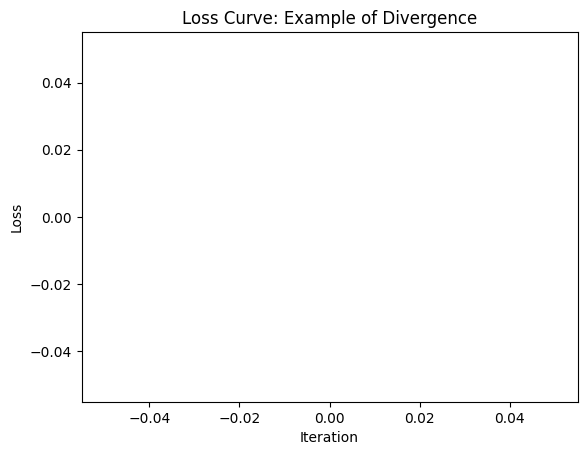

In [73]:
# Sample of diverging behavior

class LogisticRegression:
    def __init__(self, learning_rate=1.0, n_iterations=100, tolerance=1e-4):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tolerance = tolerance
        self.theta = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        linear_model = np.dot(X, self.theta)
        predictions = self.sigmoid(linear_model)
        loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        return loss

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)

        for i in range(self.n_iterations):
            linear_model = np.dot(X, self.theta)
            predictions = self.sigmoid(linear_model)
            gradient = (1 / n_samples) * np.dot(X.T, (predictions - y))

            # Apply the gradient update with a high learning rate
            self.theta -= self.learning_rate * gradient

            # Compute and store the loss
            loss = self.compute_loss(X, y)
            self.loss_history.append(loss)

            # Print loss every few iterations to monitor behavior
            if i % 10 == 0:
                print(f"Iteration {i}, Loss: {loss}")

            # Check if loss is NaN (indicating divergence)
            if np.isnan(loss):
                print("Diverged: Loss became NaN.")
                break

    def plot_loss(self):
        plt.plot(self.loss_history)
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.title("Loss Curve: Example of Divergence")
        plt.show()

# Generate synthetic data
def generate_data(n_samples=900, class_sep=2.0):
    half_samples = n_samples // 2
    X0 = np.random.randn(half_samples, 2) + np.array([-class_sep, -class_sep])
    X1 = np.random.randn(half_samples, 2) + np.array([class_sep, class_sep])
    X = np.vstack((X0, X1))
    y = np.hstack((np.zeros(half_samples), np.ones(half_samples)))
    return X, y

# Simulate divergence with high learning rate
X, y = generate_data()
model = LogisticRegression(learning_rate=5.5, n_iterations=100)
model.fit(X, y)
model.plot_loss()